In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

import requests
import json
import io

In [71]:
# В описании API для яндекс диска от Яндекс

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
url_df = 'https://disk.yandex.ru/d/guhDSjFliVqwtg'

final_url = base_url + urlencode(dict(public_key=url_df)) # Однозначно надо преобразовывать, иначе не будет работать.

In [72]:
# Запрос и виртуальное чтение

response = requests.get(final_url)
download_url = response.json()['href']
download_response = requests.get(download_url)
df = pd.read_csv(io.BytesIO(download_response.content))
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


# Задание №1. 
Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
Сколько уникальных рекламных кампаний было проведено? 
Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [76]:
# проверка числа наблюдений
print('Число наблюдений равно', df.shape[0])
print('Число столбцов равно', df.shape[1])

Число наблюдений равно 1143
Число столбцов равно 11


In [78]:
# Проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [82]:
# Проверка пропущенных значений
df.isna().count()

ad_id                  1143
xyz_campaign_id        1143
fb_campaign_id         1143
age                    1143
gender                 1143
interest               1143
Impressions            1143
Clicks                 1143
Spent                  1143
Total_Conversion       1143
Approved_Conversion    1143
dtype: int64

In [87]:
# Вопрос: Сколько уникальных рекламных кампаний было проведено? 
df.xyz_campaign_id.nunique()

3

# Задание 3
Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:
Hint: np.log()

C:\Users\Alexa\AppData\Local\Temp\ipykernel_484\2383141206.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rez.Impressions, kde = False)


<Axes: xlabel='Impressions'>

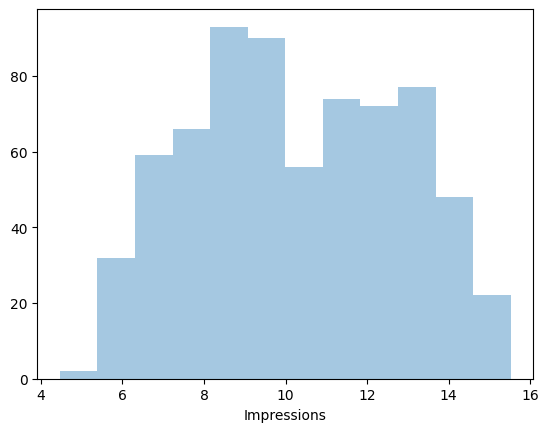

In [129]:
df_rez = df.groupby(by='fb_campaign_id', as_index =  False).agg({'Impressions':'sum'})
#df_rez
df_rez['Impressions'] = np.log(df_rez['Impressions'])
#df_rez
sns.distplot(df_rez.Impressions, kde = False)